PRE-LECTURE QUESTIONS

QUESTION 1)

Classification Decision Trees allow you to predict the value of an outcome variable which is categorical.  It does the same thing as multiple linear regression (predicting outcome variable), except MLR can only predict the value of quantitative continuous outcome variables.  So, when trying to predict a categorical variable, you need to use Classification Decision Trees.

Examples where this is a good model: Predicting things like medical diagnoses and credit risk.

At each level of the decision tree, the data is separated based on whether it fits into the provided category or not.  These levels can be binary, or have multiple categories for data to fall into.  The deeper the tree (meaning it has more levels), the more times the data is separated by category.  In contrast, multiple linear regression uses the predictor variables to calculate a line of best fit for the data, and uses that to predict the value of the outcome variable.

QUESTION 2)

For this question, I'll use the example from tutorial of a medical diagnosis (positive or negative)

1. Accuracy:  This measures the total proportion of patients that the model correctly diagnosed.  So, it adds up the percentages that were diagnosed as positive and were actually positive, as well as those that were diagnosed/predicted as negative by the model and were actually negative.  The higher the total percentage is, the better the model is at accuratly diagnosing patients.

2. Sensitivity:  This measures how good the model is at accuratly identifying people who have tested positive.  It does this by dividing the number of people it correctly identified as positive by the number of people that were ACTUALLY positive (both those the model got right and those that it diagnosed with false negatives).

3. Specificity:  This measures the opposite of sensitivity: the proportion of the total negative patients that the model correctly identified as negative.

4. Precision:  This divides the number of people who the model CORRECTLY predicted as positive by the total number of people it predicted were positive (which may include some people that were ACTUALLY negative, and the model was wrong).

QUESTION 3)

In [8]:
import pandas as pd

# Load and preprocess the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocessing
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'], errors='ignore')
ab_reduced_noNaN = ab_reduced.dropna()
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Initial Exploratory Data Analysis (EDA)

# 1. Display the shape of the dataset
print(f"Dataset Shape: {ab_reduced_noNaN.shape}")

# 2. Display column data types
print("\nColumn Data Types:")
print(ab_reduced_noNaN.dtypes)

# 3. Summary statistics for numerical columns
print("\nSummary Statistics (Numerical Columns):")
print(ab_reduced_noNaN.describe())

# 4. Distribution of categorical columns
print("\nCategory Counts for 'Hard_or_Paper':")
print(ab_reduced_noNaN['Hard_or_Paper'].value_counts())

# 5. Checking for unique values in 'Pub year'
print("\nUnique Publication Years:")
print(sorted(ab_reduced_noNaN['Pub year'].unique()))

# 7. Check for duplicates
num_duplicates = ab_reduced_noNaN.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {num_duplicates}")

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_70/2858588807.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_70/2858588807.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_70/2858588807.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Dataset Shape: (319, 10)

Column Data Types:
Title              object
Author             object
List Price        float64
Amazon Price      float64
Hard_or_Paper    category
NumPages            int64
Publisher          object
Pub year            int64
ISBN-10            object
Thick             float64
dtype: object

Summary Statistics (Numerical Columns):
       List Price  Amazon Price    NumPages     Pub year       Thick
count  319.000000    319.000000  319.000000   319.000000  319.000000
mean    18.362978     12.941034  334.272727  2002.175549    0.903448
std     13.976755     12.436673  161.601510    10.646133    0.365261
min      1.500000      0.770000   24.000000  1936.000000    0.100000
25%     13.890000      8.600000  208.000000  1998.000000    0.600000
50%     15.000000     10.200000  320.000000  2005.000000    0.900000
75%     19.360000     12.560000  416.000000  2010.000000    1.100000
max    139.950000    139.950000  896.000000  2011.000000    2.100000

Category Counts fo

QUESTION 4)

In [16]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing) with a random seed
train_data, test_data = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Print the number of observations in each set
print(f"Number of observations in training data: {len(train_data)}")
print(f"Number of observations in testing data: {len(test_data)}")

Number of observations in training data: 255
Number of observations in testing data: 64


There are 255 observations in the training data (80%) and 64 in the testing data (20%)

|--- List Price <= 17.97
|   |--- List Price <= 10.80
|   |   |--- class: False
|   |--- List Price >  10.80
|   |   |--- class: False
|--- List Price >  17.97
|   |--- List Price <= 27.27
|   |   |--- class: True
|   |--- List Price >  27.27
|   |   |--- class: False



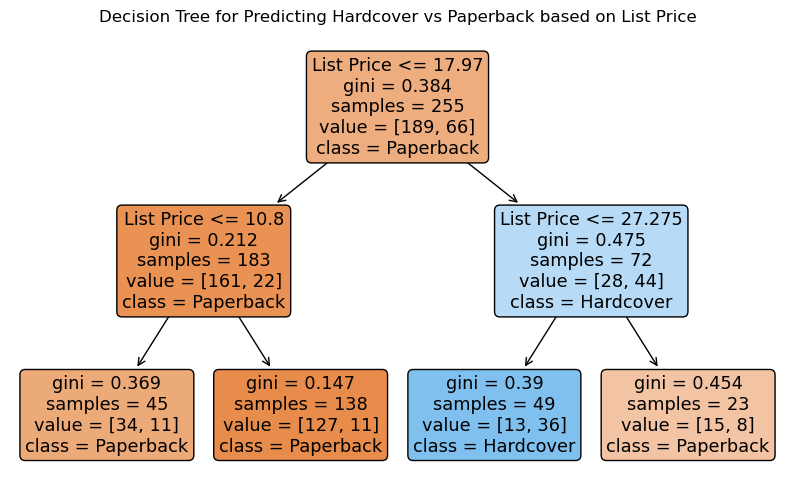

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets (already done earlier)
# X is the list price and y is the target (hardcover or paperback)
X_train = train_data[['List Price']]  # Feature: List Price
y_train = pd.get_dummies(train_data["Hard_or_Paper"])['H']  # Target: 'H' for Hardcover

# Initialize the DecisionTreeClassifier with a max_depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model using the training data
clf.fit(X_train, y_train)

# Print the trained model (the tree structure)
from sklearn.tree import export_text
tree_rules = export_text(clf, feature_names=['List Price'])
print(tree_rules)

import matplotlib.pyplot as plt
from sklearn import tree

# Plot the trained decision tree
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True, rounded=True)
plt.title('Decision Tree for Predicting Hardcover vs Paperback based on List Price')
plt.show()


    This model predicts whether a book is hard or soft cover based on its price.  If the book costs less than $17.97, the model predicts it to be paperback.  On the other hand, if it's more expensive than $17.97, the     model again separates the books into 2 categories, based on whether they cost more or less than $27.28.  If  they're more expensive than this, it predicts them to be hardcover, while if less expensive, it still        predicts paperback.

Pre-Lecture Question Chatbot Links/Summaries:

NotebookLM Custom Chatbot Summary (questions 1-4):
"This chat focused on clarifying and expanding on statistical concepts related to model evaluation. It began with you asking for verification of your understanding of accuracy, sensitivity, specificity, and precision. These metrics are crucial for assessing the performance of classification models, such as those used in medical diagnosis. You accurately grasped the meanings of accuracy, sensitivity, and specificity but had a minor misunderstanding about precision. The chat corrected this misunderstanding and explained that precision measures the proportion of predicted positive cases that are actually true positives, highlighting the reliability of positive predictions.
The sources, while not explicitly defining these metrics, do support their relevance by:
●
Repeatedly stressing the importance of model performance evaluation using appropriate metrics.
●
Discussing Type I and Type II Errors in hypothesis testing, which relate to sensitivity (minimizing Type II Errors) and specificity (minimizing Type I Errors).
The conversation highlighted important nuances of these metrics:
●
Trade-offs: Often, there's a trade-off between sensitivity and specificity, requiring prioritization based on context.
●
Context Matters: The choice of metric to emphasize depends heavily on the situation and the consequences of different error types.
The second part of the chat focused on your description of a classification decision tree predicting a book's cover type (hardcover or paperback) based on its price. You described a model with a hierarchical structure, using price thresholds to classify books. This was confirmed as an accurate example of a classification decision tree.
Here's how the chat connected your example to relevant concepts:
●
Predicting a Categorical Outcome: Your example correctly used a classification decision tree for a categorical outcome (book cover type), aligning with the use of such trees for predicting categorical variables.
●
Hierarchical Structure and Binary Splits: Your description exhibited a clear hierarchical structure with binary (yes/no) decisions at each level, consistent with decision tree principles.
●
Thresholds for Continuous Predictors: You effectively used price, a continuous variable, to make decisions by setting thresholds ($17.97 and $27.28). While not explicitly mentioned in the sources, decision trees often handle continuous predictors by establishing thresholds or ranges.
●
Interpretability: The simplicity and clarity of your example highlighted the interpretability of decision trees, a quality emphasized in the sources.
The chat also provided a visualization of your decision tree and connected it to broader themes from the sources:
●
Data Types and Analysis: The sources underscore the importance of considering data types when selecting analysis methods. Your example illustrated this by using a classification decision tree for a categorical outcome and a continuous predictor.
●
Indicator Variables: The chat noted that indicator variables weren't necessary in your example because decision trees handle continuous variables directly. This point contrasted with the use of indicator variables in multiple linear regression (MLR), which was discussed in the sources.
Overall, the chat successfully clarified key metrics for model evaluation, explored the mechanics of a classification decision tree, and connected these concepts to principles discussed in the sources."

ChatGPT links / summaries:

Question 1-2: https://chatgpt.com/share/6737ef84-928c-800c-afcb-394d4abfddd8
"In this chat, we discussed the definitions and real-world applications of key performance metrics used in classification tasks:

Accuracy: Measures the overall proportion of correct predictions (true positives and true negatives). It’s useful when false positives and false negatives have similar costs. For example, in general diagnostic tasks or balanced datasets.

Sensitivity: Measures how well the model identifies actual positives (true positives). It's critical in situations where missing a positive case is costly, such as in medical diagnostics (e.g., cancer screening).

Specificity: Measures how well the model identifies actual negatives (true negatives). This metric is useful in confirming diagnoses or ruling out conditions, minimizing false positives in situations like follow-up medical tests.

Precision: Measures the proportion of predicted positives that are correct (true positives). It’s important when acting on false positives is costly, such as in high-stakes systems like fraud detection or marketing.

Each metric addresses different trade-offs depending on the problem context, focusing on either reducing false positives or false negatives, and is chosen based on the cost or impact of these errors in real-world applications."

Question 3-4: https://chatgpt.com/share/6737efa1-e7a4-800c-befa-499c1eb0e123
"Here's a summary of our chat:

Initial Request: You began by processing the Amazon Books dataset, including removing specific columns, handling missing data, and setting correct data types for certain columns like Pub year, NumPages, and Hard_or_Paper.

Exploratory Data Analysis (EDA): We discussed performing initial EDA steps, including basic summary statistics, correlation analysis, and visualizations. An issue arose when trying to calculate correlations due to the presence of non-numeric data in the dataset.

Splitting the Data: You used train_test_split() to divide the dataset into training and testing sets (80% for training, 20% for testing), followed by displaying the number of observations in each category.

Training a Decision Tree: You wanted to use a DecisionTreeClassifier model from scikit-learn to predict whether a book is hardcover or paperback based on its List Price. You successfully trained the model and explored its predictions.

Model Interpretation: We discussed how the decision tree splits the data at specific List Price values (17.97, 10.8, and 27.28) based on the optimal separation of hardcover and paperback books. You asked for an explanation of how the decision tree made these splits.

Final Model Explanation: The model splits the books into categories based on List Price:

Books priced ≤ $17.97 are predicted as paperbacks.
Books priced > $17.97 are further split:
> $27.28 is predicted as hardcover.
≤ $27.28 is predicted as paperback.
This decision tree structure reflects the way the model makes its predictions based on price.

Let me know if you'd like to dive deeper into any of these points!"

POST-LECTURE QUESTIONS)

QUESTION 5)

Number of observations in training data: 255
Number of observations in testing data: 64
|--- List Price <= 17.97
|   |--- NumPages <= 82.00
|   |   |--- Thick <= 0.25
|   |   |   |--- class: False
|   |   |--- Thick >  0.25
|   |   |   |--- class: True
|   |--- NumPages >  82.00
|   |   |--- Thick <= 1.65
|   |   |   |--- Thick <= 0.55
|   |   |   |   |--- class: False
|   |   |   |--- Thick >  0.55
|   |   |   |   |--- class: False
|   |   |--- Thick >  1.65
|   |   |   |--- class: True
|--- List Price >  17.97
|   |--- Thick <= 0.95
|   |   |--- NumPages <= 228.00
|   |   |   |--- List Price <= 25.98
|   |   |   |   |--- class: True
|   |   |   |--- List Price >  25.98
|   |   |   |   |--- class: False
|   |   |--- NumPages >  228.00
|   |   |   |--- class: False
|   |--- Thick >  0.95
|   |   |--- NumPages <= 632.00
|   |   |   |--- Thick <= 1.05
|   |   |   |   |--- class: True
|   |   |   |--- Thick >  1.05
|   |   |   |   |--- class: True
|   |   |--- NumPages >  632.00
|   |   |

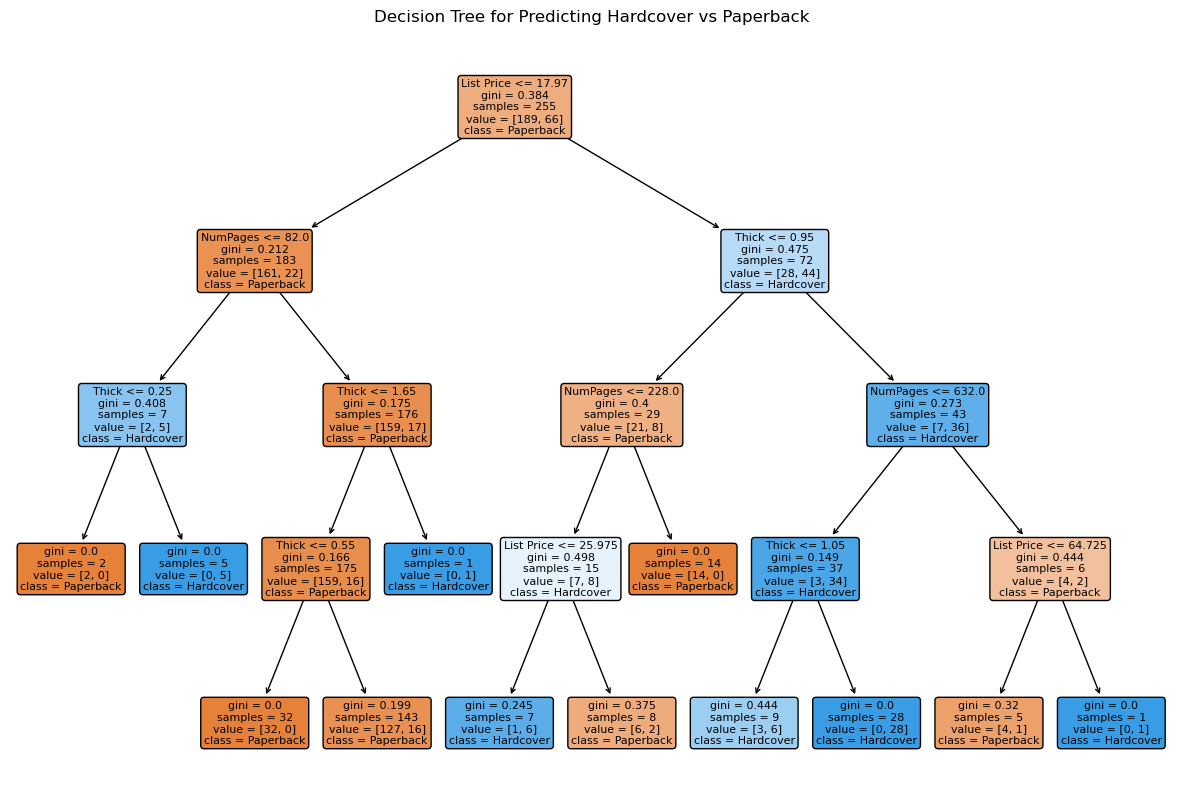

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'], errors='ignore')
ab_reduced_noNaN = ab_reduced.dropna()

# Split the data (80% training, 20% testing) with a random seed
train_data, test_data = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Print the number of observations in each set
print(f"Number of observations in training data: {len(train_data)}")
print(f"Number of observations in testing data: {len(test_data)}")

# Features: NumPages, Thick, List Price; Target: Hardcover or Paperback
X_train = train_data[['NumPages', 'Thick', 'List Price']]
y_train = pd.get_dummies(train_data["Hard_or_Paper"])['H']  # 'H' for Hardcover

# Initialize the DecisionTreeClassifier with a max_depth of 4
clf = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model using the training data
clf.fit(X_train, y_train)

# Print the trained model (the tree structure)
tree_rules = export_text(clf, feature_names=['NumPages', 'Thick', 'List Price'])
print(tree_rules)

# Visualize the trained decision tree
plt.figure(figsize=(15, 10))
plot_tree(
    clf, 
    feature_names=['NumPages', 'Thick', 'List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True, 
    rounded=True
)
plt.title('Decision Tree for Predicting Hardcover vs Paperback')
plt.show()


This tree makes decisions by determining the best single predictor variable at each decision point.  It then separates the data based on whether they meet the cutoff determined by the model, so that all the observations below the threshold are sent to the right side, and those that are above the threshold are sent left.  Then, for each of these, the model predicts whether the books are likely to be paperback or hardcover.  So, first separates by Price, then goes on to separate by number of pages and thickness later in the tree.  By the time the bottom of the tree is reached, the predictions grow quite accurate.

QUESTION 6)

Model clf:
Sensitivity: 0.909
Specificity: 0.700
Accuracy: 0.844

Model clf2:
Sensitivity: 0.909
Specificity: 0.750
Accuracy: 0.859


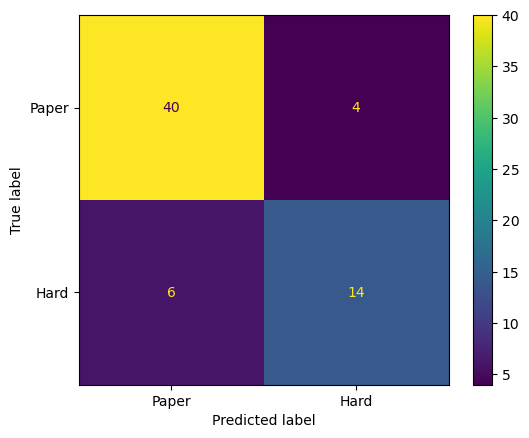

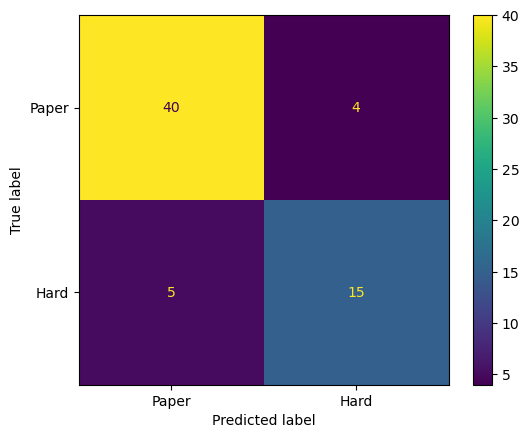

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import pandas as pd

# Split the data (80% training, 20% testing) with a random seed
train_data, test_data = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)
ab_reduced_noNaN_test = test_data

# Prepare target variable
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # 'H' for Hardcover

# Model 1: clf_price (trained on 'List Price')
X_train_clf = train_data[['List Price']]
y_train_clf = pd.get_dummies(train_data["Hard_or_Paper"])['H']

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train_clf, y_train_clf)

X_test_clf = ab_reduced_noNaN_test[['List Price']]
y_pred_clf = clf.predict(X_test_clf)

# Model 2: clf_full (trained on 'NumPages', 'Thick', and 'List Price')
X_train_clf2 = train_data[['NumPages', 'Thick', 'List Price']]
y_train_clf2 = pd.get_dummies(train_data["Hard_or_Paper"])['H']

clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train_clf2, y_train_clf2)

X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]
y_pred_clf2 = clf2.predict(X_test_clf2)

# Confusion Matrices and Metrics
def evaluate_model(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tp, fn, fp, tn = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = accuracy_score(y_test, y_pred)
    return cm, sensitivity, specificity, accuracy

# Evaluate clf_price
cm_price, sensitivity_price, specificity_price, accuracy_price = evaluate_model(y_test, y_pred_clf)

# Evaluate clf_full
cm_full, sensitivity_full, specificity_full, accuracy_full = evaluate_model(y_test, y_pred_clf2)

# Print results
print("Model clf:")
print(f"Sensitivity: {sensitivity_price:.3f}")
print(f"Specificity: {specificity_price:.3f}")
print(f"Accuracy: {accuracy_price:.3f}")

# Plot confusion matrix for clf_price
ConfusionMatrixDisplay(cm_price, display_labels=["Paper", "Hard"]).plot()

print("\nModel clf2:")
print(f"Sensitivity: {sensitivity_full:.3f}")
print(f"Specificity: {specificity_full:.3f}")
print(f"Accuracy: {accuracy_full:.3f}")

# Plot confusion matrix for clf_full
ConfusionMatrixDisplay(cm_full, display_labels=["Paper", "Hard"]).plot()


QUESTION 7)

The two confusion matrices presented in question 7 differ from each other based on their input/predictor variables.  The first one is trained only on List Price, while the second has multiple input variables it was trained on (NumPages, Thick, List Price).  They are essentially the same as the two matrices in the previous question, except the output variable is different.  Here, it's "life_exp_good," which is not a column that exists in the csv.  Otherwise, if this variable were corrected, they would be the same.

QUESTION 8)

The most important feature for making predictions is 'List Price' with an importance of 0.4275


/tmp/ipykernel_71/2605095535.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")


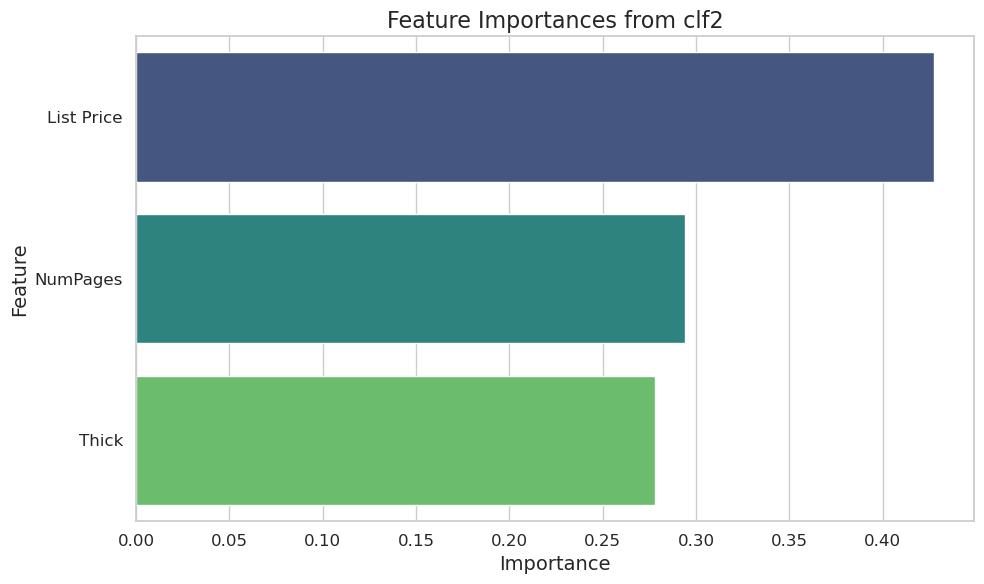

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load and preprocess the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocessing
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'], errors='ignore')
ab_reduced_noNaN = ab_reduced.dropna().copy()  # Create a copy to avoid SettingWithCopyWarning

# Ensure the relevant columns are in the correct format
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Thick'] = ab_reduced_noNaN['Thick'].astype(float)  # Ensure 'Thick' is numeric
ab_reduced_noNaN.loc[:, 'List Price'] = ab_reduced_noNaN['List Price'].astype(float)  # Ensure 'List Price' is numeric
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Define the input features for clf2 (only relevant features)
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Only use 'NumPages', 'Thick', 'List Price'
y = ab_reduced_noNaN['Hard_or_Paper']  # Target variable remains 'Hard_or_Paper'

# Encoding categorical target variable
y = LabelEncoder().fit_transform(y)

# Train a classifier (clf2) - using DecisionTreeClassifier as an example
clf2 = DecisionTreeClassifier(random_state=42)
clf2.fit(X, y)

# Get feature importances and feature names from clf2
importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the most important feature
most_important_feature = feature_names[indices[0]]
most_important_importance = importances[indices[0]]
print(f"The most important feature for making predictions is '{most_important_feature}' with an importance of {most_important_importance:.4f}")

# Set up the plot size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot the feature importances as a horizontal bar chart for better readability
plt.title("Feature Importances from clf2", fontsize=16)
sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")

# Customize the plot
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


List Price is the most important predictor variable in clf2, with an importance of 0.4275.

QUESTION 9)

In linear regression, the coefficients represent how much the outcome variable is expected to change if their input variable changes and everything else remains constant.  In Confusion matrices, the importance calculation and interpretation is much more complicated, but is a measure of how much each feature/input variable improves predictions.

QUESTION 10)

Somewhat